In [2]:
%autosave 0
from __future__ import absolute_import, division, print_function

%pylab inline

from matplotlib.colors import ListedColormap
from sklearn import datasets
from scipy import linalg
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

Autosave disabled
Populating the interactive namespace from numpy and matplotlib


# Exercise 12

### Load samples from iris

In [4]:
iris = datasets.load_iris()
X = iris.data[:, :2] # 4-dimensional data; we use only the first two dimensions
y = iris.target

In [5]:
classes = set(y)
print('Data set with {0} samples and {1} classes.'.format(len(y), len(classes)))
for cl in classes:
    n = np.count_nonzero(y == cl)
    print('Class {0} occurs {1} times.'.format(cl, n))

Data set with 150 samples and 3 classes.
Class 0 occurs 50 times.
Class 1 occurs 50 times.
Class 2 occurs 50 times.


In [6]:
stepsize = 0.005
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max + stepsize, stepsize), np.arange(y_min, y_max + stepsize, stepsize))
data = np.c_[xx.ravel(), yy.ravel()]

### Remove samples with the same $x_1$ and $x_2$ coordinate
Sometimes it happens that two points have the same x and y coordinate. We wan't to get rid of those points by dropping them out.

In [7]:
unique_list = list()
X2 = []
y2 = []
for x1, x2, cl in zip(X[:,0], X[:,1], y):
    x1 = int(x1 * 10 + .5) / 10
    x2 = int(x2 * 10 + .5) / 10
    h = x1 + 1j * x2
    if not h in unique_list:
        unique_list.append(h)
        X2.append([x1, x2])
        y2.append(cl)
X = np.array(X2)
y = np.array(y2)

classes = set(y)
print('Data set with {0} samples and {1} classes.'.format(len(y), len(classes)))
for cl in classes:
    n = np.count_nonzero(y == cl)
    print('Class {0} occurs {1} times.'.format(cl, n))

Data set with 116 samples and 3 classes.
Class 0 occurs 38 times.
Class 1 occurs 44 times.
Class 2 occurs 34 times.


# Classification

## Logistic Regression

In [6]:
LogClf = LogisticRegression()
LogClf.fit(X, y)

exLog = y
predLog = LogClf.predict(data)
print(metrics.classification_report(exLog, LogClf.predict(X)))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95        38
          1       0.67      0.84      0.75        44
          2       0.76      0.47      0.58        34

avg / total       0.78      0.78      0.76       116



## Naive Bayes

In [7]:
gaussianClf = GaussianNB()
gaussianClf.fit(X,y)

# make predictions
exGauss   = y
predGauss = gaussianClf.predict(data)
print(metrics.classification_report(exGauss, gaussianClf.predict(X)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        38
          1       0.72      0.77      0.75        44
          2       0.68      0.62      0.65        34

avg / total       0.80      0.80      0.80       116



## Visual Output

In [8]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


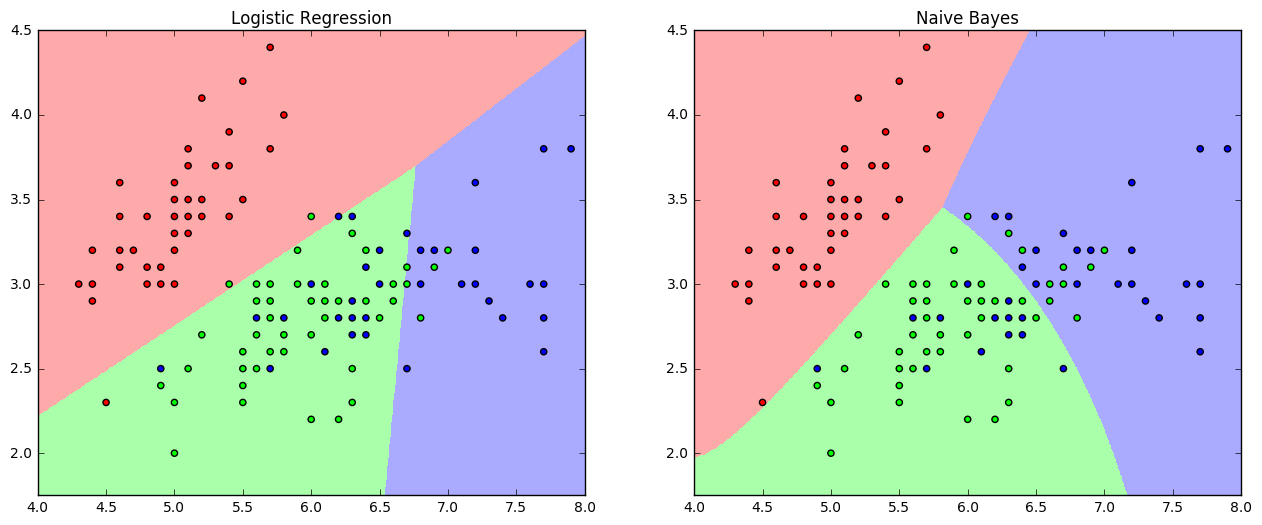

In [9]:
figure(figsize(24,6))

plt.subplot(1,3,1)
pcolormesh(xx, yy, predLog.reshape(xx.shape), cmap=cmap_light)
# plot the training samples, too
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(4, 8), plt.ylim(1.75, 4.5)
plt.title("Logistic Regression");

plt.subplot(1,3,2)
pcolormesh(xx, yy, predGauss.reshape(xx.shape), cmap=cmap_light)
# plot the training samples, too
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(4, 8), plt.ylim(1.75, 4.5)
plt.title("Naive Bayes");

## Decision Tree Classifier

In [10]:
DtClf = DecisionTreeClassifier()
DtClf.fit(X, y)

exDt = y
predDt = DtClf.predict(data)

print(metrics.classification_report(exDt, DtClf.predict(X)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        38
          1       1.00      1.00      1.00        44
          2       1.00      1.00      1.00        34

avg / total       1.00      1.00      1.00       116



## $k$ Nearest Neighbors Classifier ($k$NN)

In [11]:
kNNclf = KNeighborsClassifier(1, weights='uniform')
kNNclf.fit(X, y);

exkNN = y
Z = kNNclf.predict(data)
print(metrics.classification_report(exkNN, kNNclf.predict(X)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        38
          1       1.00      1.00      1.00        44
          2       1.00      1.00      1.00        34

avg / total       1.00      1.00      1.00       116



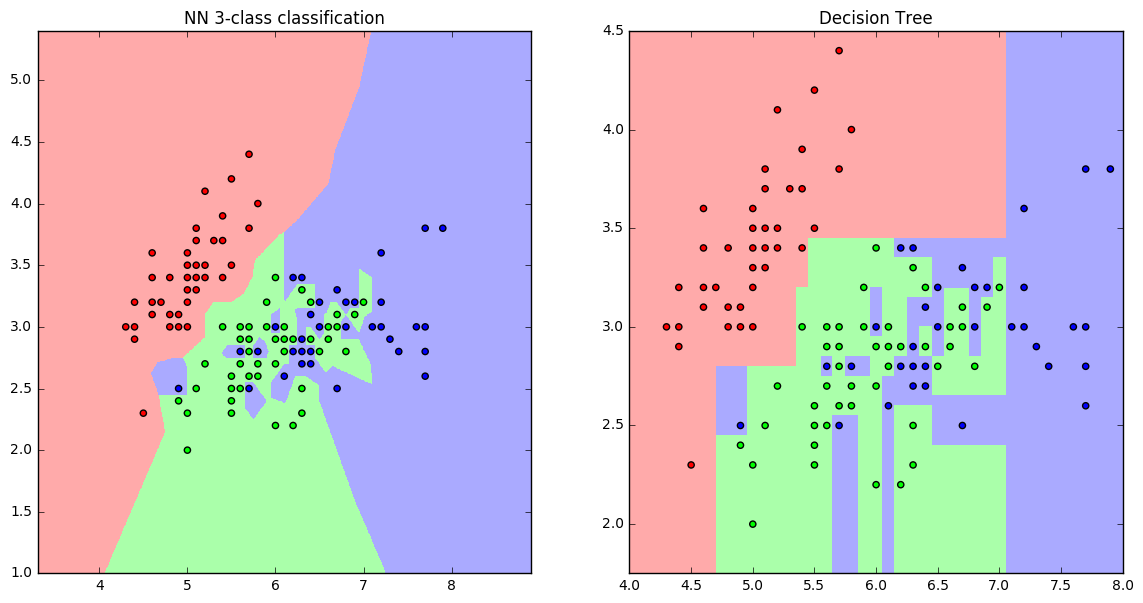

In [12]:
figure(figsize(14,7))

plt.subplot(1,2,1)
pcolormesh(xx, yy, Z.reshape(xx.shape), cmap=cmap_light)

# plot the training samples, too
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(x_min, x_max), plt.ylim(y_min, y_max)
plt.title("NN 3-class classification");

plt.subplot(1,2,2)
pcolormesh(xx, yy, predDt.reshape(xx.shape), cmap=cmap_light)
# plot the training samples, too
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(4, 8), plt.ylim(1.75, 4.5)
plt.title("Decision Tree");

Using a small k makes the classification sensitive to noise. If k is too large, we have many misclassifications!

## Visualization of the classification result for varying numbers of neighbors

In [13]:
def kNN_classifier(k, X, y, data, shape):
    clf = KNeighborsClassifier(k, weights='uniform')
    clf.fit(X, y)
    print(metrics.precision_score(y, clf.predict(X),average='weighted'))
    return clf.predict(data).reshape(shape)

1.0
0.846890063033
0.801592667718
0.809454647676
0.786656671664


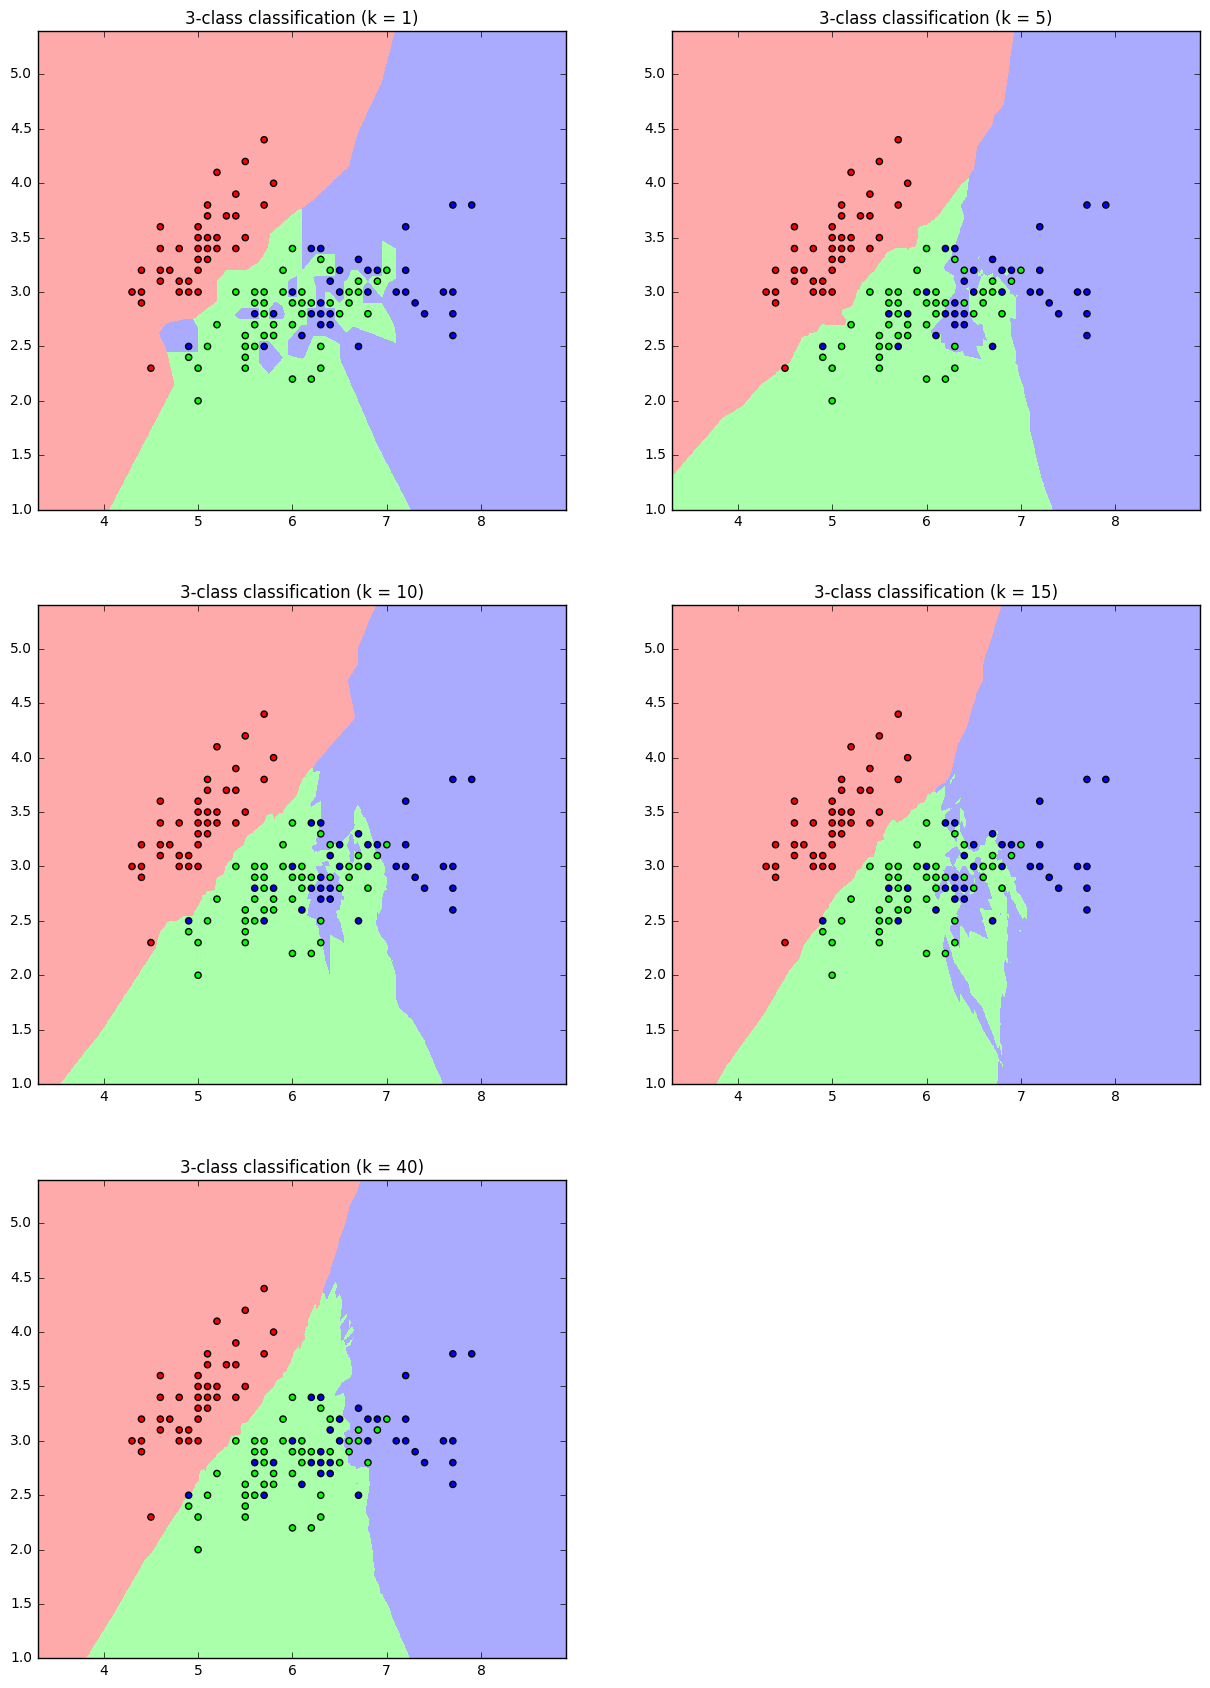

In [14]:
number_of_neighbors = [1, 5,10, 15,40]
n = int(len(number_of_neighbors) / 2 + 0.5)
figure(figsize(15, 7 * n))
for i, k in enumerate(number_of_neighbors):
    plt.subplot(n, 2, i + 1)
    Z = kNN_classifier(k, X, y, data, xx.shape)
    pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # plot the training samples, too
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(x_min, x_max), plt.ylim(y_min, y_max)
    plt.title("3-class classification (k = {0})".format(k));